# **SINGLE THRESHOLDING**

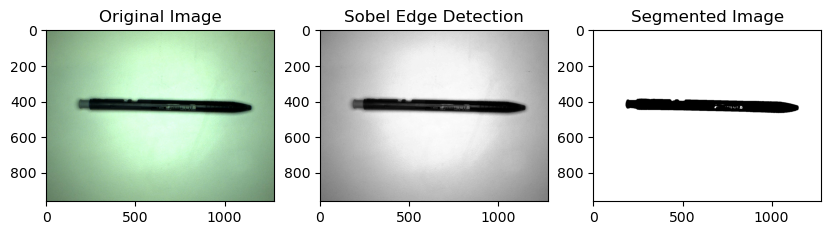

In [23]:
# Initiliaze file
from PIL import Image
import matplotlib.pyplot as plt
filename = "single.jpg"

with Image.open(filename) as img:
     img.load()

# Single Thresholding
img_gray = img.convert("L")
threshold = 100
img_threshold = img_gray.point(
     lambda x: 255 if x > threshold else 0)


# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel Edge Detection')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Segmented Image')
plt.imshow(img_threshold, cmap='gray')

plt.show()

# **K MIN CLUSTERING SEGMENTATION 1 OBJECT**

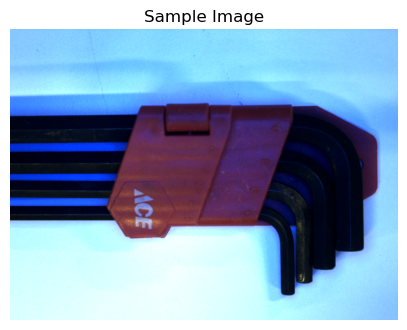

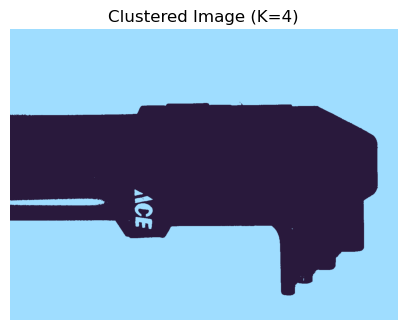

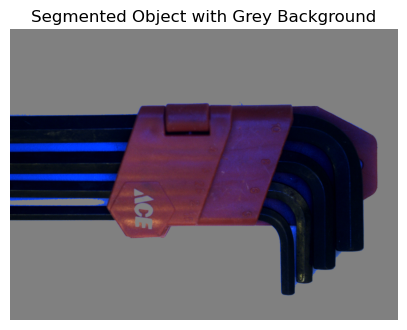

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('red_original.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.title('Sample Image')
plt.axis('off')
plt.show()

# Step 2: Reshape the image into a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Step 3: Convert to float32 for K-means
pixels = np.float32(pixels)

# Step 4: Define criteria, number of clusters (K), and apply K-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 2  # Number of clusters (e.g., 4 clusters)
_, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Step 5: Convert back to 8-bit values and reshape to the original image shape
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_rgb.shape)

# Display the segmented image (K-means result)
plt.figure(figsize=(5, 5))
plt.imshow(segmented_image)
plt.title('Clustered Image (K=4)')
plt.axis('off')
plt.show()

# Step 6: Create a mask for the two foreground clusters (e.g., clusters 1 and 2)
labels_reshaped = labels.reshape(image_rgb.shape[:2])
foreground_mask = np.logical_or(labels_reshaped == 1, labels_reshaped == 2).astype(np.uint8)

# Step 7: Create a grey background
grey_background = np.full_like(image_rgb, 128)  # Grey color

# Step 8: Replace the background of the segmented object with grey
segmented_object_with_grey_background = np.where(foreground_mask[:, :, np.newaxis], image_rgb, grey_background)

# Display the segmented object with grey background
plt.figure(figsize=(5, 5))
plt.imshow(segmented_object_with_grey_background)
plt.title('Segmented Object with Grey Background')
plt.axis('off')
plt.show()


# **K MIN CLUSTERING SEGMENTATION 3 OBJECT**

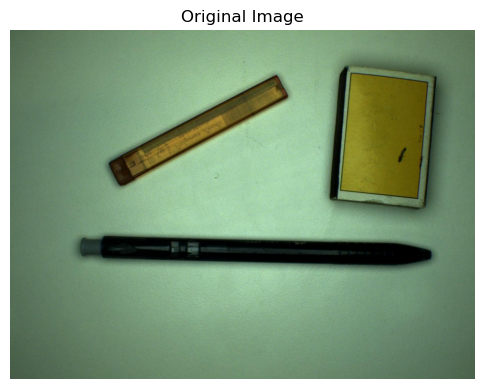

c:\Users\Joel Lim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


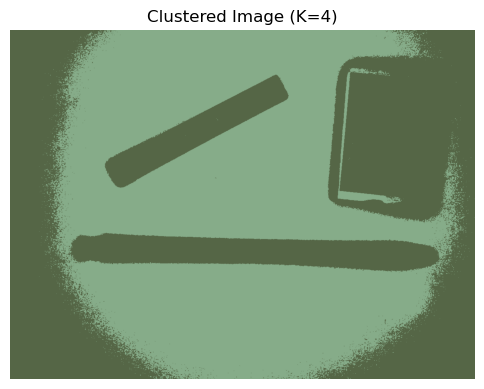

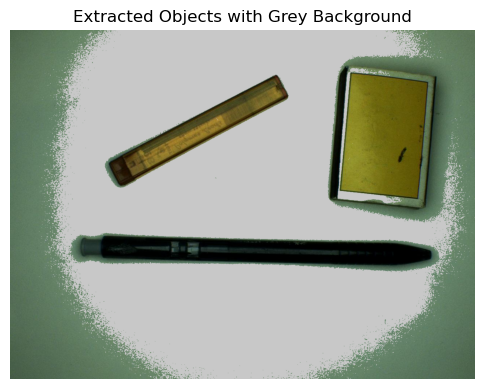

In [62]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image_path = 'multiple.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original RGB image
plt.figure(figsize=(6, 6))
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Reshape the image to be a list of pixels
pixels = image_rgb.reshape(-1, 3)

# Number of clusters
k = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Convert labels to the same shape as the original image
segmented_labels = labels.reshape(image_rgb.shape[:2])

# Display the segmented labels (each pixel is colored based on its cluster)
segmented_image = cluster_centers[segmented_labels].reshape(image_rgb.shape).astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.title('Clustered Image (K=4)')
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

# Compute distances of cluster centers to grey color
grey_color = np.array([200, 200, 200])
distances = np.linalg.norm(cluster_centers - grey_color, axis=1)
background_cluster = np.argmin(distances)

# Create a new image with grey background
grey_background_img = np.full_like(image_rgb, grey_color)

# For each cluster that's not the background, retain the original color
for i in range(k):
    if i != background_cluster:
        mask = segmented_labels == i
        grey_background_img[mask] = image_rgb[mask]

# Display the final image with extracted objects on grey background
plt.figure(figsize=(6, 6))
plt.title('Extracted Objects with Grey Background')
plt.imshow(grey_background_img)
plt.axis('off')
plt.show()


# **GRAPH CUT SEGMENTATION**

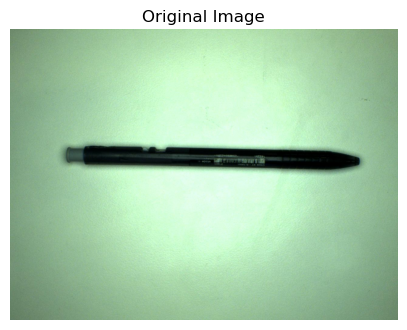

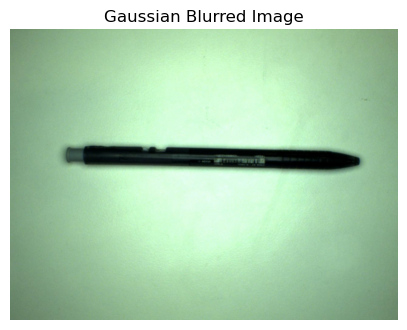

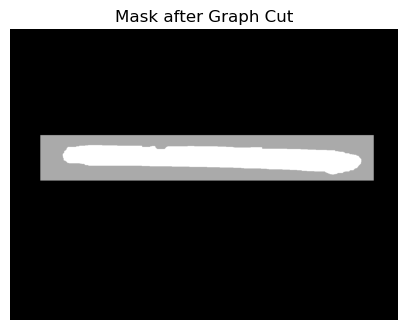

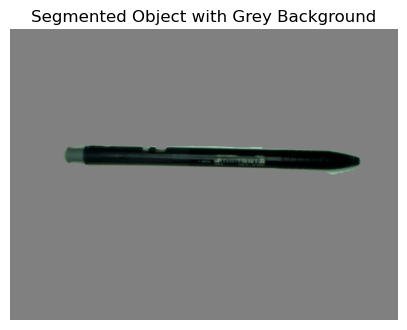

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('single.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 2: Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Display the Gaussian blurred image
plt.figure(figsize=(5, 5))
plt.imshow(blurred_image)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

# Step 3: Create an initial mask
# Initialize the mask to probable background (GC_PR_BGD)
mask = np.zeros(blurred_image.shape[:2], np.uint8)

# Step 4: Define the rectangle that roughly contains the object
# Adjust the rectangle dimensions as needed
rect = (100, 350, 1100, 150)

# Step 5: Create models for the background and foreground
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Step 6: Apply GrabCut with the rectangle initialization
cv2.grabCut(blurred_image, mask, rect, bgd_model, fgd_model, 10, cv2.GC_INIT_WITH_RECT)

# Display the mask after GrabCut
plt.figure(figsize=(5, 5))
plt.imshow(mask, cmap='gray')
plt.title('Mask after Graph Cut')
plt.axis('off')
plt.show()

# Step 7: Modify the mask so that 0 and 2 pixels are set to 0 (background),
# and 1 and 3 pixels are set to 1 (foreground)
mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Step 8: Create a grey background image
grey_background = np.full_like(blurred_image, fill_value=128)  # Grey background (RGB value [128, 128, 128])

# Step 9: Combine the segmented object with the grey background
segmented_image_with_grey_bg = grey_background.copy()
segmented_image_with_grey_bg[mask_final == 1] = blurred_image[mask_final == 1]

# Display the final segmented image with gray background
plt.figure(figsize=(5, 5))
plt.imshow(segmented_image_with_grey_bg)
plt.title('Segmented Object with Grey Background')
plt.axis('off')
plt.show()


# **GRAPH CUT FOR 3 OBJECTS**

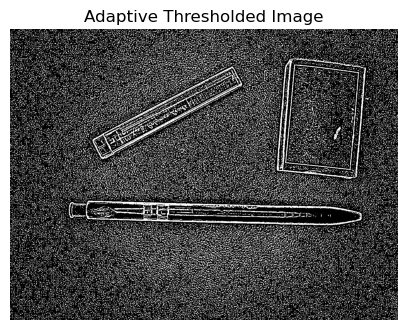

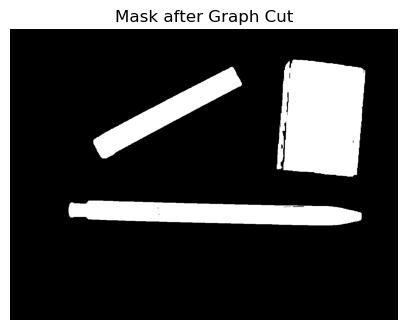

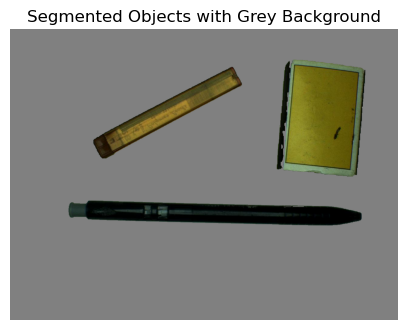

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_gamma(image, gamma=1.0):
    # Build a lookup table mapping pixel values [0, 255] to their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load the image
image = cv2.imread('multiple.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY_INV, 
    11, 
    2
)

# Display the adaptive thresholded image
plt.figure(figsize=(5, 5))
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholded Image')
plt.axis('off')
plt.show()

# Apply Gamma correction
gamma_corrected = adjust_gamma(image_rgb, gamma=4.0)  # Adjust gamma value as needed

# Apply Gaussian filtering
blurred_image = cv2.GaussianBlur(gamma_corrected, (5, 5), 2)  # Adjusted blur parameters

# Initialize mask, background model, and foreground model
mask = np.zeros(blurred_image.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define polygon for the first object
polygon1 = np.array([[200, 300], [720, 50], [820, 250], [300, 450]], np.int32)
polygon_mask1 = np.zeros_like(mask)
cv2.fillPoly(polygon_mask1, [polygon1], cv2.GC_PR_FGD)

# Improve the mask by setting probable foreground/background
mask[polygon_mask1 == cv2.GC_PR_FGD] = cv2.GC_PR_FGD  # Set as probable foreground
mask[polygon_mask1 == 0] = cv2.GC_BGD  # Set the rest as probable background

# Run grabCut with more iterations
cv2.grabCut(blurred_image, mask, None, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_MASK)  # Increased iterations

# Extract object1
mask1 = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype('uint8')

# Apply Graph Cut algorithm for the remaining objects
# For object 2
mask[:] = 0
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(blurred_image, mask, (800, 50, 400, 450), bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# For object 3
mask[:] = 0
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(blurred_image, mask, (100, 550, 1100, 100), bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask3 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Combine all masks into a single mask
combined_mask = mask1 | mask2 | mask3

# Display the combined mask of all objects
plt.figure(figsize=(5, 5))
plt.imshow(combined_mask, cmap='gray')
plt.title('Mask after Graph Cut')
plt.axis('off')
plt.show()

# Extract all objects using the combined mask
final_objects = image_rgb * combined_mask[:, :, np.newaxis]

# Create a gray background
gray_background = np.full_like(image_rgb, 128)

# Combine the segmented objects with the gray background
final_image = gray_background.copy()
final_image[combined_mask == 1] = final_objects[combined_mask == 1]

# Display the final segmented image with gray background
plt.figure(figsize=(5, 5))
plt.imshow(final_image)
plt.title('Segmented Objects with Grey Background')
plt.axis('off')
plt.show()


# **CANNY EDGE**

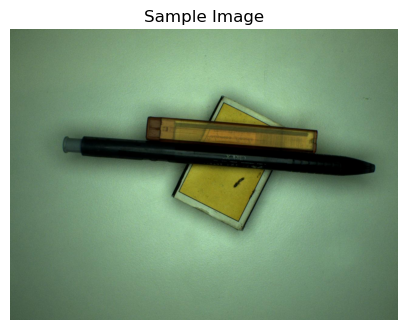

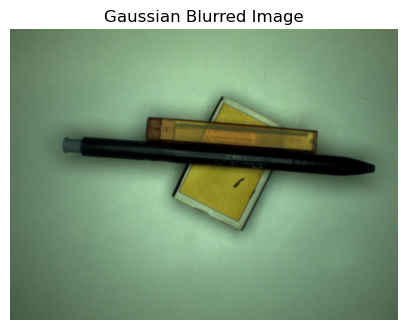

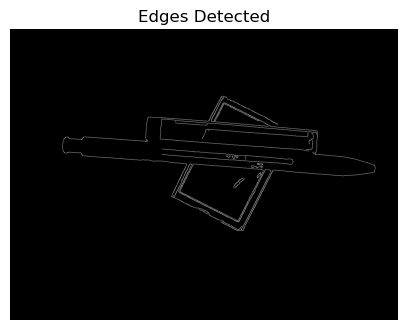

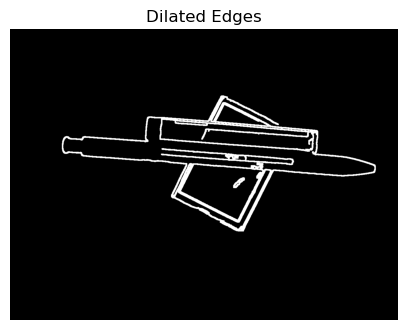

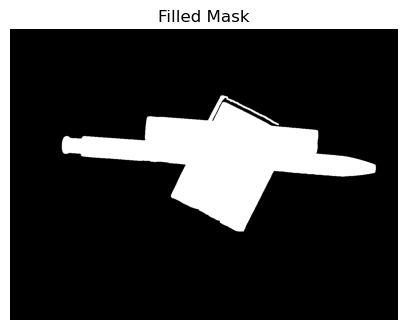

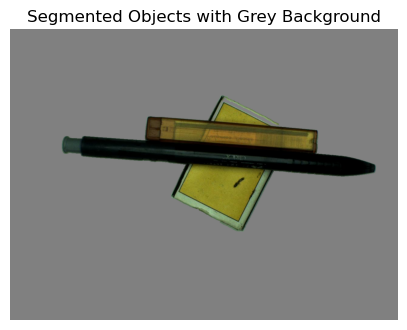

In [26]:
# Canny Edge Segmentation (Double Thresholding)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_bgr = cv2.imread('stacked.jpg', cv2.IMREAD_COLOR)  # Load image in BGR
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Dilation to remove noise
dilated_image = cv2.dilate(image, (5,5), iterations=2)
dilated_image_rgb = cv2.dilate(image_rgb, (5,5), iterations=2)

# Step 2: Apply Gaussian Filtering
blurred_image = cv2.GaussianBlur(dilated_image, (5, 5), 1.4)
blurred_image_rgb = cv2.GaussianBlur(dilated_image_rgb, (5, 5), 1.4)

# Step 3: Perform Edge Detection using Canny Edge Detector
edges = cv2.Canny(blurred_image, 40, 95)

# Step 4: Dilate the edges to make them thicker
kernel = np.ones((5, 5), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

# Step 5: Fill the object using flood fill or by finding contours
filled_mask = np.zeros_like(image)
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fill each contour
cv2.drawContours(filled_mask, contours, -1, (255), thickness=cv2.FILLED)

# Step 6: Apply the mask to the original image to isolate the object
segmented_image = np.zeros_like(image_rgb)
segmented_image[filled_mask == 255] = image_rgb[filled_mask == 255]
# segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2RGB)

# Step 7: Create a gray background
gray_background = np.full_like(image_rgb, 128)  # 128 corresponds to a mid-gray color in RGB

# Combine the segmented image with the gray background
final_image = gray_background.copy()
final_image[filled_mask == 255] = segmented_image[filled_mask == 255]

# Display each image individually
plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.title('Sample Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(blurred_image_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(dilated_edges, cmap='gray')
plt.title('Dilated Edges')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(filled_mask, cmap='gray')
plt.title('Filled Mask')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(final_image)
plt.title('Segmented Objects with Grey Background')
plt.axis('off')
plt.show()